## Traffic Sign Recognition

### Prepared by: Almee Christian (027982082) & Taher Vora (027972904)

## Importing Libraries

In [19]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.utils import shuffle
import cv2

## Converting image to array and giving labels

In [20]:
data=[]
labels=[]
classes=58
cur_path=os.getcwd()

for i in range(classes):
    path=os.path.join(cur_path,"Chinese_train_set",str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image=Image.open(path +'\\'+ a)
            image=image.resize((32,32))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error")
data=np.array(data)
labels=np.array(labels)

In [21]:
data1=[]
labels1=[]
classes1=58
cur_path=os.getcwd()

for i in range(classes1):
    path1=os.path.join(cur_path,"CT_test",str(i))
    images1=os.listdir(path1)

    for a in images1:
        try:
            image1=Image.open(path1 +'\\'+ a)
            image1=image1.resize((32,32))
            image1=np.array(image1)
            data1.append(image1)
            labels1.append(i)
        except:
            print("Error")
data1=np.array(data1)
labels1=np.array(labels1)

In [24]:
X_train, y_train = data, labels
X_test, y_test = data1, labels1

## Data Exploration

In [25]:
trainCount=X_train.shape[0]
testCount=X_test.shape[0]
imageShape=X_train.shape[1:]

print("Training Data Count----",trainCount)
print("Test Data Count---",testCount)
print("Shape of a single image is ----",imageShape)

# Number of classes present in the dataset
classNum = np.unique(y_train).shape[0]
print("Number of classes ---",classNum)

Training Data Count---- 6046
Test Data Count--- 1169
Shape of a single image is ---- (32, 32, 3)
Number of classes --- 58


## Visualizing Data

Text(0.5, 1.0, 'Training Sample Representation according to class image count')

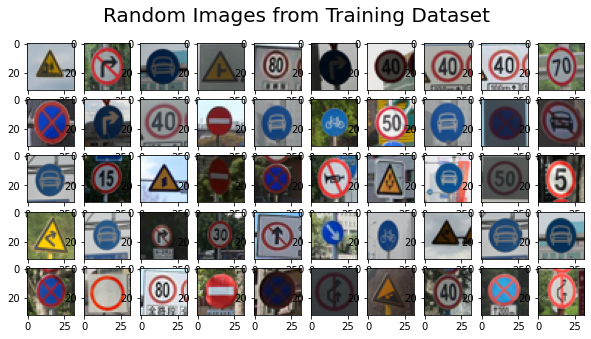

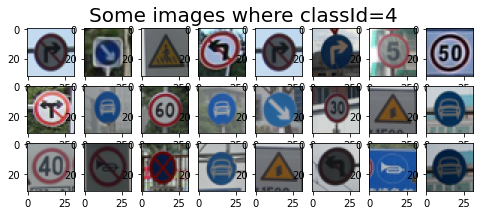

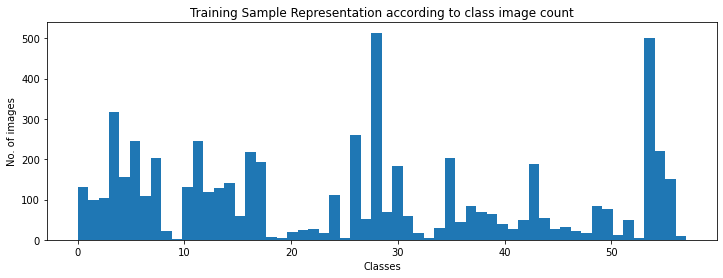

In [48]:
def viewImages(data,title,xNum,yNum):
    fig = plt.figure(figsize=(xNum,yNum))
    fig.suptitle(title, fontsize=20)
    for i in range(1,(xNum*yNum)+1):
        index = random.randint(0,len(data))
        # "squeeze" Remove single-dimensional entries from the shape of an array.
        imageObj = data[index].squeeze()
        # plot image using "imshow" function from matplotlib
        plt.subplot(yNum,xNum,i)
        plt.imshow(imageObj)

# call to view some random images from training data set
viewImages(X_train,"Random Images from Training Dataset",10,5)

# call to view some random images of a single class
viewImages(X_train[np.where(y_train==4)],"Some images where classId=4",8,3)

# lets plot the number of images given per class
fig = plt.figure(figsize=(12,4))
plt.hist(y_train, classNum)
plt.xlabel('Classes')
plt.ylabel('No. of images')
plt.title('Training Sample Representation according to class image count')

## Data Normalization and Grayscaling

"Normalization" prevents from the numerical unstabilities which can ocuur when the data resides far away from zero. It improve analysis of various models.

"GrayScale" conversion helps in obtaining better results.

In [27]:
# code for grayscaling
def grayScaleImg(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)[:,:,None]

# code for normalization - i.e, convert an image from [0:255] to [-1:1] range
def normalizeImg(image):
    img=image / 255 * 2 - 1
    return img

# method to call for grayscaling and normalization
def processImage(image):
    img=grayScaleImg(image)
    img=normalizeImg(img)
    return img

# method to pre-process all the datasets
def processData(data):
    # create a zero value matrix of same shape
    imgs = np.zeros(shape=data.shape)
    imgDepth = processImage(data[0]).shape[2]
    imgs = imgs[:,:,:,0:imgDepth]
    for i in tqdm(range(data.shape[0])):
        imgs[i] = processImage(data[i])        
    return imgs

xTrainPP=processData(X_train)
xTestPP=processData(X_test)

100%|██████████| 1169/1169 [00:00<00:00, 25376.48it/s]


#### Sample to show grayscaling and normalization on an image

(array([ 4.,  4.,  0., 11.,  0., 11.,  0., 16.,  0., 13.,  0., 19.,  0.,
        23.,  0., 15.,  0., 22.,  0., 14., 16.,  0., 10.,  0., 18.,  0.,
        10.,  0., 18.,  0., 21.,  0., 18.,  0., 29.,  0., 21.,  0., 16.,
        15.,  0., 16.,  0., 14.,  0., 12.,  0., 16.,  0., 12.,  0., 15.,
         0., 21.,  0., 19.,  0., 22.,  8.,  0., 25.,  0., 30.,  0., 32.,
         0., 24.,  0., 25.,  0., 22.,  0., 13.,  0., 14.,  0., 10.,  0.,
        12.,  7.,  0.,  7.,  0.,  8.,  0.,  9.,  0.,  9.,  0.,  6.,  0.,
         6.,  0.,  6.,  0.,  8.,  0.,  5.,  5.,  0.,  6.,  0.,  6.,  0.,
         5.,  0.,  6.,  0.,  4.,  0.,  6.,  0.,  4.,  0.,  5.,  0.,  6.,
         4.,  0.,  1.,  0.,  3.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  2.,
         0.,  1.,  0.,  0.,  0.,  4.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,
         2.,  2.,  0.,  5.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.

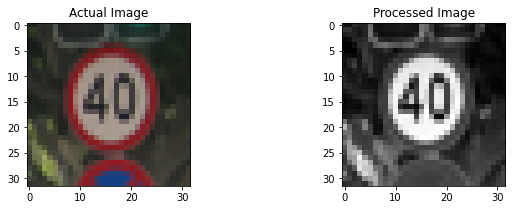

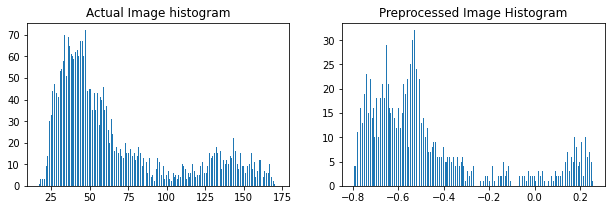

In [28]:
# let's assume index=549 for now (it can be anything)
testImgIndex=549

sampleImg=X_train[testImgIndex]
sampleImgPP=grayScaleImg(sampleImg)
fig=plt.figure(figsize=(16,3))
sub=plt.subplot(131)
sub.set_title("Original Image")
plt.imshow(sampleImg)
sub=plt.subplot(132)
sub.set_title("Processed Image")
plt.imshow(sampleImgPP.squeeze(), cmap='gray')

# code to plot histograms of images
dim1 = sampleImg.shape[0]
dim2 = sampleImg.shape[1]
dim3 = sampleImg.shape[2]
sampleImgRS = np.reshape(sampleImg, dim1*dim2*dim3)
plt.figure(figsize=(16,3))
sub=plt.subplot(131)
sub.set_title("Original Image histogram")
plt.hist(sampleImgRS, 255)

sampleImgP = xTrainPP[testImgIndex]
dim1 = sampleImgP.shape[0]
dim2 = sampleImgP.shape[1]
dim3 = sampleImgP.shape[2]
sampleImgPRS = np.reshape(sampleImgP, dim1*dim2*dim3)
sub=plt.subplot(132)
sub.set_title("Processed Image Histogram")
plt.hist(sampleImgPRS,255)

## Model Architecture

The LeNet5 CNN architecture was thought of by Yann Lecun as early as in 1998. It is one of the earliest CNN’s (maybe even the first?) and was specifically designed to classify handwritten digits. The LeNet5 architecture only consists of 5 layers, it is a good starting point for learning how to build CNN’s. The Lenet5 architecture looks as follows:

layer 1: a convolutional layer, with a relu activation function, followed by an average pooling layer.

layer 2: a convolutional layer, with a relu activation function, followed by an average pooling layer.

layer 3: a fully connected network (relu activation)

layer 4: a fully connected network (relu activation)

layer 5: the output layer

#### Parameters affect the output size of a layer

It has four parameters:

    1. The input image, a 4D Tensor with dimensions [batch size, image_width, image_height, image_depth]
    2. An weight matrix, a 4-D Tensor with dimensions [filter_size, filter_size, image_depth, filter_depth]
    3. The number of strides in each dimension.
    4. Padding (‘SAME’ / ‘VALID’)
    
We have decided to use "AdamOptimizer" because "GradientDescentOptimizer" always needed over 2000 learning steps no matter what cross entropy calculation or learning rate was used.

We opt for "ReLU" activation function because compared to tanh / sigmoid neurons that involve expensive operations (exponentials, etc.), whereas ReLU can be implemented by simply thresholding a matrix of activations at zero.

To reduce or to handle overfitting, we used L2 regularization method which has equation of Least Square Errors. To get optimum prediction with regard to predictive discrimination we are using L2 over L1.

In [42]:
EPOCHS = 15
batchSize = 128
learnRate = 0.001

def cnnArchitecture(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # "truncated_normal" - Outputs random values from a truncated normal distribution.
    # "Variable" - initialize tensorflow variables of size returned by truncated_normal
    # conv1_w represents weights and conv1_b represent bias
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, imageDepth, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    
    #"tf.nn.conv2d" - Flattens the filter to a 2-D matrix with shape,
    #                 Extracts image patches from the input tensor to form a virtual tensor of shape
    #                 For each patch, right-multiplies the filter matrix and the image patch vector.
    # 'strides' - The stride of the sliding window for each dimension of input
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # contains 156 iterables parameters and 122304 connections

    # Activation - Computes rectified linear: max(features, 0)
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6. - Performs the avg pooling on the input.
    # Each entry in output is the mean of the corresponding size ksize window in value.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # contains 12 iterables parameters and 5880 connections

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # contains 32 iterables parameters and 2000 connections
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
        
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # contains 12 iterables parameters and 5880 connections

    # Flatten. Input = 5x5x16. Output = 400. - flatten data with respect to dimensions
    fc0   = tf.compat.v1.layers.flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # contains 48120 iterables connections
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # contains 10164 iterable parameters
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classNum), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(classNum))
    predictArr = tf.matmul(fc2, fc3_W) + fc3_b
    
    return predictArr

imageDepth=xTrainPP.shape[3]

# "placeholder" - feed data into the graph through these placeholders in tensorflow.
x = tf.placeholder(tf.float32, (None, 32, 32, imageDepth))
y = tf.placeholder(tf.int32, (None))

# "one_hot" - encoding where we create N new features, where N is the number of unique values in the original feature. 
yOHVal = tf.one_hot(y, classNum)

# Here 'x' is the tensorflow placeholders output on the imageDepth we get from the pre-processed training dataset
predictArr = cnnArchitecture(x)

# "trainable_variables" - return trainable variables list
varss = tf.trainable_variables()

# add variables to the loss function
# Computes half the L2 norm of a tensor without the sqrt
# to prevent model from overfitting we are using l2 regularization - Least Square Errors equation
lossL2 = tf.add_n([ tf.nn.l2_loss(v) for v in varss
                    if '_b' not in v.name ]) * 0.0001

# "softmax_cross_entropy_with_logits" - Measures the probability error in discrete classification tasks in which the classes are mutually exclusive
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(logits=predictArr,labels= yOHVal)
# "reduce_mean" - Computes the mean of elements across dimensions of a tensor.
lossOpr = tf.reduce_mean(crossEntropy) + lossL2

# Adam - A Method for Stochastic Optimization
optimizer = tf.train.AdamOptimizer(learning_rate = learnRate)
# "minimize" - Add operations to minimize loss by updating var_list
trainOpr = optimizer.minimize(lossOpr)

# "tf.argmax" - Returns the index with the largest value across axis of a tensor.
# prediction by comparing the largest value in logits and class labels - returns a 1-D array of 0's and 1's
corrPredict = tf.equal(tf.argmax(predictArr, 1), tf.argmax(yOHVal, 1))

# "tf.cast" - for type casting the prediction array to float
accuracyOpr = tf.reduce_mean(tf.cast(corrPredict, tf.float32))
# to save the final tensor
saver = tf.train.Saver()

# method to evaluate data according to the batch size on model saved - calculate accuracy
def evaluateAccuracy(X_data, y_data):
    totalLen = len(X_data)
    totalAccuracy = 0
    accuracyArr=[]
    # "tf.get_default_session" - The default Session being used in the current thread.
    sess = tf.get_default_session()
    for offset in range(0, totalLen, batchSize):
        # prepare data according to batch size
        batch_x, batch_y = X_data[offset:offset+batchSize], y_data[offset:offset+batchSize]
        # "run" - feed the data on accuracy values to find the accuracy rate
        accuracy = sess.run(accuracyOpr, feed_dict={x: batch_x, y: batch_y})
        accuracyArr.append(accuracy)
        totalAccuracy += (accuracy * len(batch_x))
    return totalAccuracy / totalLen,accuracyArr


# method to evaluate data according to the batch size on model saved - calculate loss
def evaluateLoss(X_data, y_data):
    totalLen = len(X_data)
    # "tf.get_default_session" - The default Session being used in the current thread.
    sess = tf.get_default_session()
    for offset in range(0, totalLen, batchSize):
        # prepare data according to batch size
        batch_x, batch_y = X_data[offset:offset+batchSize], y_data[offset:offset+batchSize]
        # "run" - feed the data on accuracy values to find the accuracy rate
        loss = sess.run([lossOpr], feed_dict={x: batch_x, y: batch_y})
    return loss


<ipython-input-42-01fdb728242d>:46: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  fc0   = tf.compat.v1.layers.flatten(conv2)


## Train and Test Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH; 1; Valid.Acc.; 0.065; Loss; 3.261
EPOCH; 2; Valid.Acc.; 0.263; Loss; 1.896
EPOCH; 3; Valid.Acc.; 0.434; Loss; 0.975
EPOCH; 4; Valid.Acc.; 0.595; Loss; 1.174
EPOCH; 5; Valid.Acc.; 0.676; Loss; 0.636
EPOCH; 6; Valid.Acc.; 0.778; Loss; 0.579
EPOCH; 7; Valid.Acc.; 0.803; Loss; 0.688
EPOCH; 8; Valid.Acc.; 0.874; Loss; 0.282
EPOCH; 9; Valid.Acc.; 0.920; Loss; 0.314
EPOCH; 10; Valid.Acc.; 0.907; Loss; 0.339
EPOCH; 11; Valid.Acc.; 0.928; Loss; 0.228
EPOCH; 12; Valid.Acc.; 0.956; Loss; 0.159
EPOCH; 13; Valid.Acc.; 0.957; Loss; 0.133
EPOCH; 14; Valid.Acc.; 0.959; Loss; 0.232
EPOCH; 15; Valid.Acc.; 0.982; Loss; 0.173
Model saved
INFO:tensorflow:Restoring parameters from .\cnnModel
Test Accuracy = 0.982


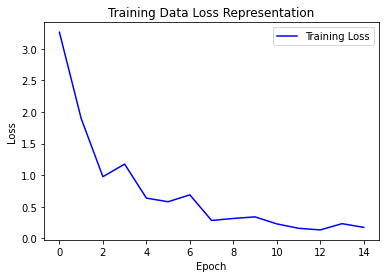

In [49]:
lossArr = []
validLossArr=[]

# SECTION TO TRAIN THE MODEL ON PRE-PROCESSED TRAINING DATA SET

# "Session" - object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.
with tf.Session() as sess:
    # initialize global varibales 
    sess.run(tf.global_variables_initializer())
    totLength = len(xTrainPP)
    
    print("Training...")
    print()
    # loop for the epochs and batch size - calculate loss
    for i in range(EPOCHS):
        # "shuffle" - to shuffle the pre-proecssed train data and class data
        xTrainPP, y_train = shuffle(xTrainPP, y_train)
        for offset in range(0, totLength, batchSize):
            end = offset + batchSize
            batch_x, batch_y = xTrainPP[offset:end], y_train[offset:end]
            # return the loss value on training data set
            to,lossVal = sess.run([trainOpr, lossOpr], feed_dict={x: batch_x, y: batch_y})
        
        # evaluate for validation data
        validAccuracy,validAccuracyArr = evaluateAccuracy(xTestPP, y_test)
        validLoss = evaluateLoss(xTestPP, y_test);
        print("EPOCH; {}; Valid.Acc.; {:.3f}; Loss; {:.3f}".format(i+1, validAccuracy, lossVal))
        
        # add the output of the prediction to array to store the model
        lossArr.append(lossVal)
        validLossArr.append(validLoss)
      
    # save the model from the session object as "cnnModel" 
    saver.save(sess, './cnnModel')
    print("Model saved")

# SECTION TO TEST THE MODEL USING PRE-PROCESSED TEST DATA SET
    
# now use the session to check the pre-processed test data
with tf.Session() as sess:
    # restore the session
    # "tf.train.latest_checkpoint()" - Finds the filename of latest saved checkpoint file.
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    # test accuracy by passing test data in evaluate method
    testAccuracy,accuracyArr = evaluateAccuracy(xTestPP, y_test)
    # method to evaluate loss on pre-prcessed test data
    testLoss = evaluateLoss(xTestPP, y_test);
    print("Test Accuracy = {:.3f}".format(testAccuracy))
    
plt.plot(lossArr, 'b',label='Training Loss')
plt.legend(loc='best')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Training Data Loss Representation")
plt.show()

# plt.plot(validLossArr, 'b',label='Validation Loss')
# plt.legend(loc='best')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.title("Validation Data Loss Representation")
# plt.show()


References :

[1] To understand the steps required for image classification in detail - https://medium.com/@techreigns/traffic-signs-classification-with-a-convolutional-neural-network-75911a1904

[2] To understand about data pre-processing - https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258

[3] To select the model architecture used some information provided from - http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

[4] For Image Augmentation we read from here - https://towardsdatascience.com/image-augmentation-using-python-numpy-opencv-and-skimage-ef027e9898da

[5] To find methods for image augmentation - https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html

[6] To understand about CNN architecture using tensorflow - https://www.datacamp.com/community/tutorials/cnn-tensorflow-python

[6.1] http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

[6.2] https://pythonprogramming.net/cnn-tensorflow-convolutional-nerual-network-machine-learning-tutorial/

[6.3] http://ataspinar.com/2017/08/15/building-convolutional-neural-networks-with-tensorflow/

[6.4] https://cv-tricks.com/tensorflow-tutorial/training-convolutional-neural-network-for-image-classification/

[7] To get familiar with required tensorflow methods - https://www.tensorflow.org/api_docs/python/

[7.1] https://www.tensorflow.org/api_docs/python/tf/compat/v1

[8] To understand about how to reduce or handle overfitting - https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a

[8.1] https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d

[9] Basic understanding - https://en.wikipedia.org/wiki/Convolutional_neural_network